In [4]:
import nltk
import re
from string import digits
import pandas as pd

In [59]:
# read twitter data witk keyword remote work
df = pd.read_csv('remote_work_2020.csv').drop(columns = ['Unnamed: 0', 'states'], axis = 1)
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,replies,likes,quote_count,geo_name,states_abbrev
0,161245760,andreaisawriter,5530,18741,"📃 Professional Resume Building Course OUT NOW,...",The Ocean 🌊,@MorsVitaEst @punkspaceship You know anybody w...,2020-12-30 15:08:43+00:00,9531d4e3bbafc09d,0,0,0,0,"Oklahoma City, OK",OK
1,726646610,ELPfan,1089,24941,St. Louis Cardinals fan for decades... Tech sa...,"Sacramento, CA",Businesses to boost collaboration spending in ...,2020-12-30 13:53:46+00:00,b90f2a335f8565c0,0,0,1,0,"Arden-Arcade, CA",CA
2,46131692,Harben_eco_dev,916,30554,Econ dev pro. Now working with business as a t...,"Prince William County, VA",Something to consider. Remote work has a dark...,2020-12-30 13:50:08+00:00,00d7e2736bc1e7dc,0,0,0,0,"County Center, VA",VA
3,71903,thorpus,6181,63494,"Husband to @LaurenEThorp, Dad to Miles & Elois...","St Louis, MO",Progress...\n\n“Headquarters aren’t going away...,2020-12-30 13:02:01+00:00,0570f015c264cbd9,0,0,0,0,"St Louis, MO",MO
4,2835431183,docmosho,8779,16983,Physician Executive 👨🏾‍💻 focused on making hea...,"New Orleans, LA",This vaccine roll out y’all...\n\nYou would th...,2020-12-30 12:52:45+00:00,dd3b100831dd1763,1,0,1,0,"New Orleans, LA",LA


In [60]:
# look at data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_id           4070 non-null   int64 
 1   username            4070 non-null   object
 2   author_followers    4070 non-null   int64 
 3   author_tweets       4070 non-null   int64 
 4   author_description  3953 non-null   object
 5   author_location     3836 non-null   object
 6   text                4070 non-null   object
 7   created_at          4070 non-null   object
 8   geo_id              4070 non-null   object
 9   retweets            4070 non-null   int64 
 10  replies             4070 non-null   int64 
 11  likes               4070 non-null   int64 
 12  quote_count         4070 non-null   int64 
 13  geo_name            4070 non-null   object
 14  states_abbrev       3980 non-null   object
dtypes: int64(7), object(8)
memory usage: 477.1+ KB


In [16]:
import string
string.punctuation
def clean_text(text):
    '''
    text cleaning, remove numbers, url, punctuation, newline, special characters
    '''
    text = text.lower()
    text = ''.join([i for i in text if not i.isdigit()])
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', '', text)
    tweet = re.sub('\w*\d\w*', '', text)
    clean_text = re.sub("@[A-Za-z0-9_]+","", tweet)
    clean_text = re.sub("#[A-Za-z0-9_]+","", clean_text)
    clean_text = re.sub(r'http\S+', '', clean_text)
    return clean_text

def text_preprocessing(text):
    '''
    preprocessing text
    '''
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunct = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunct)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [61]:
df['clean_text'] = df['text'].apply(lambda x: text_preprocessing(x))

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['clean_text'] = df['clean_text'].apply(lambda x: stem_words(x))

In [64]:
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,replies,likes,quote_count,geo_name,states_abbrev,clean_text
0,161245760,andreaisawriter,5530,18741,"📃 Professional Resume Building Course OUT NOW,...",The Ocean 🌊,@MorsVitaEst @punkspaceship You know anybody w...,2020-12-30 15:08:43+00:00,9531d4e3bbafc09d,0,0,0,0,"Oklahoma City, OK",OK,morsvitaest punkspaceship know anybodi need ne...
1,726646610,ELPfan,1089,24941,St. Louis Cardinals fan for decades... Tech sa...,"Sacramento, CA",Businesses to boost collaboration spending in ...,2020-12-30 13:53:46+00:00,b90f2a335f8565c0,0,0,1,0,"Arden-Arcade, CA",CA,busi boost collabor spend remot work continu v...
2,46131692,Harben_eco_dev,916,30554,Econ dev pro. Now working with business as a t...,"Prince William County, VA",Something to consider. Remote work has a dark...,2020-12-30 13:50:08+00:00,00d7e2736bc1e7dc,0,0,0,0,"County Center, VA",VA,someth consid remot work dark side way make su...
3,71903,thorpus,6181,63494,"Husband to @LaurenEThorp, Dad to Miles & Elois...","St Louis, MO",Progress...\n\n“Headquarters aren’t going away...,2020-12-30 13:02:01+00:00,0570f015c264cbd9,0,0,0,0,"St Louis, MO",MO,progress headquart go away compani embrac hub ...
4,2835431183,docmosho,8779,16983,Physician Executive 👨🏾‍💻 focused on making hea...,"New Orleans, LA",This vaccine roll out y’all...\n\nYou would th...,2020-12-30 12:52:45+00:00,dd3b100831dd1763,1,0,1,0,"New Orleans, LA",LA,vaccin roll would think death gang folk say wa...


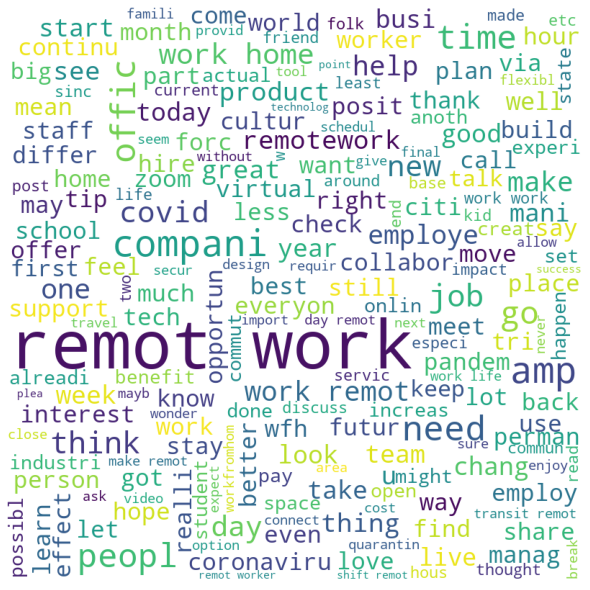

In [119]:
#generate word cloud
tweets = ''
for tweet in df['clean_text'].values:
    tweets += ''.join(tweet)+' '
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

There are some positive emoiton words associate with remote work tweet, such as love, best, great, flexible

In [106]:
from datetime import datetime
from datetime import timedelta
#convert date str to datetime
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z').date())
df['month'] = df['date'].apply(lambda x: x.month)
#create new column indicate # of tweet
df['tweet'] = 1

In [107]:
#group # of tweets, # of retweets, # of replies, # of likes and # of quote count in month
df_aggre = df.groupby(by = 'month').sum()

In [108]:
df_aggre = df_aggre.drop(columns = ['author_id', 'author_followers', 'author_tweets'])
df_aggre['month'] = df_aggre.index
df_aggre.reset_index(drop = True)

,retweets,replies,likes,quote_count,#tweet,tweet,month
0,499.0,183.0,3932.0,78.0,98.0,98.0,1
1,112.0,133.0,779.0,21.0,155.0,155.0,2
2,977.0,664.0,6739.0,127.0,1160.0,1160.0,3
3,301.0,226.0,2236.0,65.0,447.0,447.0,4
4,338.0,233.0,2156.0,71.0,439.0,439.0,5
5,116.0,97.0,767.0,13.0,189.0,189.0,6
6,198.0,208.0,1242.0,34.0,390.0,390.0,7
7,171.0,232.0,1379.0,38.0,305.0,305.0,8
8,108.0,119.0,733.0,16.0,268.0,268.0,9
9,320.0,156.0,1337.0,24.0,221.0,221.0,10


In [117]:
#general statistic for monthly data
df_aggre.describe()

,retweets,replies,likes,quote_count,#tweet,tweet,month
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,278.416667,205.166667,1941.166667,45.916667,339.166667,339.166667,6.500000
std,253.683216,153.817385,1768.247557,33.494798,282.504331,282.504331,3.605551
min,78.000000,87.000000,733.000000,13.000000,98.000000,98.000000,1.000000
25%,115.000000,122.750000,776.000000,23.250000,180.500000,180.500000,3.750000
50%,184.500000,169.500000,1297.500000,36.000000,260.500000,260.500000,6.500000
75%,324.500000,227.500000,2176.000000,66.500000,402.250000,402.250000,9.250000
max,977.000000,664.000000,6739.000000,127.000000,1160.000000,1160.000000,12.000000


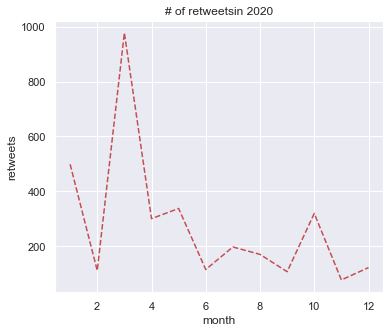

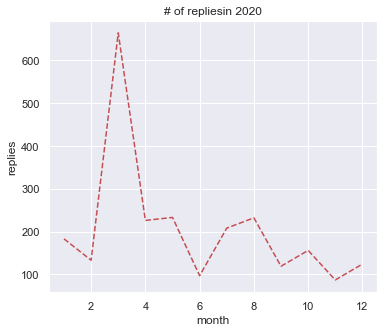

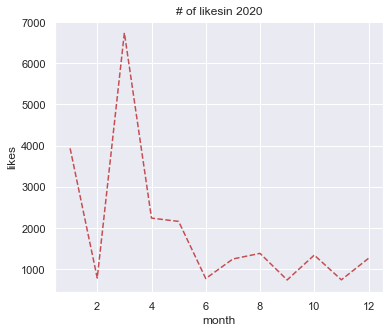

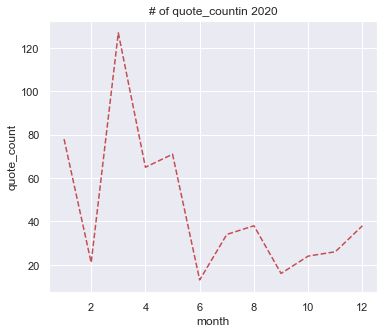

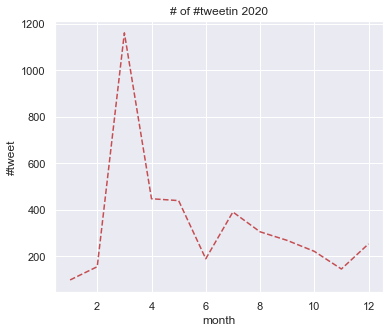

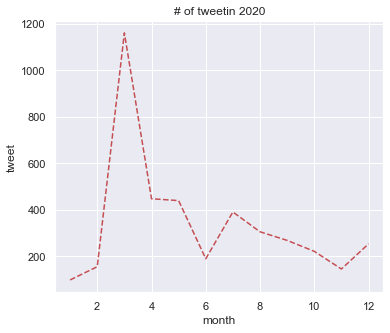

In [110]:
#simple plot data
import matplotlib.pyplot as plt
for column in df_aggre.columns[:-1]:
    plt.figure(figsize=(20, 5))
    plt.subplot(132)
    plt.plot(df_aggre[column],'r--')
    plt.ylabel(column)
    plt.xlabel('month')
    plt.title('# of '+column+'in 2020')

Obviously tweets metrics reach culmination at March because it is during official lock down, so people rely on social media for communication and interaction